In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [6]:
X = df[["Age", "EstimatedSalary", "Gender"]]
y = df["Purchased"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
lc = LogisticRegression()
lc.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_pred = lc.predict(X_test)

In [11]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[50,  2],
       [ 7, 21]])

In [12]:
tp, fp, fn, tn = cm.ravel()
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"TP, FP, FN, TN: {tp}, {fp}, {fn}, {tn}")
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {recall}")

TP, FP, FN, TN: 50, 2, 7, 21
Accuracy: 0.8875
Precision: 0.9130434782608695
Recall: 0.75


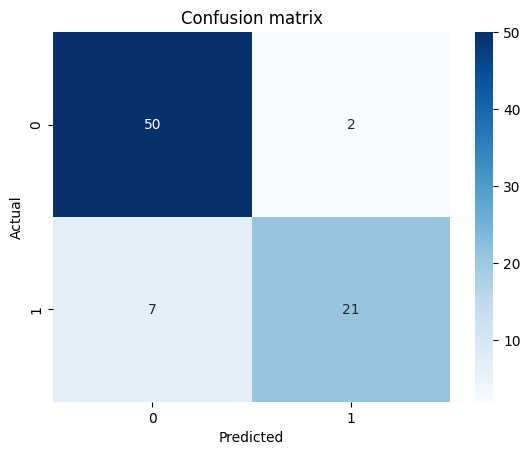

In [13]:
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()